### Tweet text 가져오기

In [1]:
import twitter
import json

CONSUMER_KEY = "rsLCYlLmpL7vtKdvr5lzXLXPf"
CONSMER_SECRET = "EkBAgIihBomoCvt72ujzYAnCP7THjGdzqf8Lf8Oi7z62S5czZr"
OAUTH_TOKEN = "1094146369617457152-JfUk5BIYDKEvlpsziAgytN76sYTUzp"
OAUTH_TOKEN_SECRET = "6UwBm7Lp3CYkjMWiKuh6mwcv7oQHnL7V2EHUci7tr2Iy0"

auth = twitter.oauth.OAuth(OAUTH_TOKEN, OAUTH_TOKEN_SECRET, CONSUMER_KEY, CONSMER_SECRET)
twitter_api = twitter.Twitter(auth = auth)
print(twitter_api)

In [296]:
q = '삼성전자'
count = 100
search_results = twitter_api.search.tweets(q = q, count = count, result_type = 'recent')

statuses = search_results['statuses']

for _ in range(20):
    print("Length of statuses:", len(statuses))
    
    try:
        next_results = search_results['search_metadata']['next_results']
        
    except KeyError:
        print(search_results['search_metadata'])
        break
        
    kwargs = dict([kv.split("=") for kv in next_results[1:].split("&")])
    kwargs['q'] = q
    search_results = twitter_api.search.tweets(**kwargs)
    statuses += search_results['statuses']
    
with open('statuses_se.json', 'w', encoding = 'utf-8') as make_file: \
    json.dump(statuses, make_file, ensure_ascii = False)

Length of statuses: 100
Length of statuses: 200
Length of statuses: 289
Length of statuses: 387
Length of statuses: 487
Length of statuses: 587
Length of statuses: 687
Length of statuses: 787
Length of statuses: 887
Length of statuses: 987


__Tokenize__

In [297]:
status_text = [status['text']for status in statuses if 'retweeted_status' not in status]

dic = dict()

for status in statuses:
    if 'retweeted_status' in status:
        retweeted_ids = status['retweeted_status']['id']
        retweeted_texts = status['text']
        
        dic[retweeted_ids] = retweeted_texts
        nodup_rts = list(dic.values())

#status_text.append(nodup_rts)
#len(status_text)

status_text += nodup_rts
len(status_text)

757

In [298]:
status_text

['삼성전자 떡상하기 전까지 돈 없을 예정임 (거렁뱅이)',
 '@bestwest1967 4년전의 아쉬움이 드디어 풀리겠네요 양향자 문재인 영입인사 삼성전자 상무 광주를 떠나지않고 묵묵히 지킨 여성의원 호남의 자랑이 되어주시길 바랍니다',
 '넷북 삼성전자 센스 NT-X170 -버스안에서 테스트 https://t.co/Qtb1Jpm2cc',
 '[ #Tistory ] 삼성전자 1분기 실적 후, 삼성증권 리포트 요약 https://t.co/FnvRhvtXx6',
 '@the_doubtist 전 우량주 요 ㅋㅋ 삼성전자 ㅋㅋ',
 '3분 후면 삼성전자 칸 코치의 시간이로군. 삼성전자 칸 하니 병구오빠와 영무오빠의 예언자가 되고 싶다.',
 '@2020_oldkiddy 저는 차트랑 이거저거 볼줄 모르는데요 단기에 훅 오르는 것은 불가하다고 생각해서요 앞으로 삼성전자 생각하면 저는 적금처럼 계속 모아두는 것은 언제든지 사도 좋다고 봅니다 제가 제왑… https://t.co/FejRMQgcDw',
 '@PeterLeejoa 분석 잘 참조 하겠습니다. 제 개인적 의견인데 삼성전자와 하이닉스의 월봉에서의 RSI하락다이버전스가 매우 강하게 나왔습니다. 과거 차트 봐도 월봉에서 하락다이버전스가 나온경우 주가가… https://t.co/XBq0Ev1tRZ',
 '킹갓황짱빅신캡탑왕산빛불그레이트마제스티카이사르우주정거장충무공제너럴뷰티풀섹시맵시아우구스투스로마황제폭풍우카트리나명탐정국방부장관육군참모총장해군참모총장공군참모총장삼성전자현대자동차르노자동차폭스바겐페라리포르쉐람보르기니애스턴마틴 우리 대 윤 수 지금 가는 중',
 '@ghd862 아쿠아 주식계의 삼성전자;',
 '@sohyun8723 삼성전자서비스센터 전화해보려구',
 '삼성전자가서 프린터 보고\n사전투표하러갔다와야지',
 '삼성전자가 그런 식으로, 흑자 부분 돈 끌어다 신규 분야 적자 보며 투자해서 반도체를 성공시켰죠 https://t.co/dcUIU6779g',
 '홍보봇인 나 김곰돌이 설명해 주지! 어반 그루브는 강남역 8번 출

In [299]:
from konlpy.tag import Okt

okt = Okt()
tokens = []

for s in status_text:
    token = okt.morphs(s)
    tokens.append(token)
    

print(tokens[:100])

[['삼성', '전자', '떡', '상', '하기', '전', '까지', '돈', '없을', '예정', '임', '(', '거렁뱅', '이', ')'], ['@bestwest1967', '4년', '전의', '아쉬움', '이', '드디어', '풀리겠네요', '양', '향', '자', '문재인', '영', '입', '인사', '삼성', '전자', '상무', '광주', '를', '떠나지', '않고', '묵묵히', '지킨', '여성', '의원', '호남', '의', '자랑', '이', '되어주시길', '바랍니다'], ['넷북', '삼성', '전자', '센스', 'NT', '-', 'X', '170', '-', '버스', '안', '에서', '테스트', 'https://t.co/Qtb1Jpm2cc'], ['[', '#Tistory', ']', '삼성', '전자', '1분', '기', '실적', '후', ',', '삼성', '증권', '리포트', '요약', 'https://t.co/FnvRhvtXx6'], ['@the_doubtist', '전', '우량', '주', '요', 'ㅋㅋ', '삼성', '전자', 'ㅋㅋ'], ['3분', '후', '면', '삼성', '전자', '칸', '코치', '의', '시간', '이', '로군', '.', '삼성', '전자', '칸', '하니', '병구', '오빠', '와', '영', '무', '오빠', '의', '예언자', '가', '되고', '싶다', '.'], ['@2020_oldkiddy', '저', '는', '차트', '랑', '이', '거저', '거', '볼줄', '모르는데요', '단기', '에', '훅', '오르는', '것', '은', '불가하다고', '생각', '해서요', '앞', '으로', '삼성', '전자', '생각', '하면', '저', '는', '적금', '처럼', '계속', '모', '아두', '는', '것', '은', '언제', '든지', '사도', '좋다고', '봅니다', '제', '가', '제왑', '…', '

__stemming&POS tagging__

In [300]:
pos_tokens = []

for s in status_text:
    pos = okt.pos(s)
    pos_tokens.append(pos)
    
print(pos_tokens[:10])

[[('삼성', 'Noun'), ('전자', 'Noun'), ('떡', 'Noun'), ('상', 'Suffix'), ('하기', 'Verb'), ('전', 'Noun'), ('까지', 'Josa'), ('돈', 'Noun'), ('없을', 'Adjective'), ('예정', 'Noun'), ('임', 'Noun'), ('(', 'Punctuation'), ('거렁뱅', 'Noun'), ('이', 'Josa'), (')', 'Punctuation')], [('@bestwest1967', 'ScreenName'), ('4년', 'Number'), ('전의', 'Foreign'), ('아쉬움', 'Noun'), ('이', 'Josa'), ('드디어', 'Adverb'), ('풀리겠네요', 'Verb'), ('양', 'Modifier'), ('향', 'Noun'), ('자', 'Suffix'), ('문재인', 'Noun'), ('영', 'Modifier'), ('입', 'Noun'), ('인사', 'Noun'), ('삼성', 'Noun'), ('전자', 'Noun'), ('상무', 'Noun'), ('광주', 'Noun'), ('를', 'Josa'), ('떠나지', 'Verb'), ('않고', 'Verb'), ('묵묵히', 'Adjective'), ('지킨', 'Verb'), ('여성', 'Noun'), ('의원', 'Noun'), ('호남', 'Noun'), ('의', 'Josa'), ('자랑', 'Noun'), ('이', 'Josa'), ('되어주시길', 'Verb'), ('바랍니다', 'Verb')], [('넷북', 'Noun'), ('삼성', 'Noun'), ('전자', 'Noun'), ('센스', 'Noun'), ('NT', 'Alpha'), ('-', 'Punctuation'), ('X', 'Alpha'), ('170', 'Number'), ('-', 'Punctuation'), ('버스', 'Noun'), ('안', 'Noun'), ('에서', 'Jo

__주요 품사만 추출__

In [301]:
FEATURE_POS = ['Noun', "Verb", "Adjective"]
pos_tags = []

for i in range(len(pos_tokens)):
    
    for word, pos in pos_tokens[i]:
        #print(pos)
        if pos in FEATURE_POS:
            tag = (word, pos)
            pos_tags.append(tag)

print(pos_tags)

[('삼성', 'Noun'), ('전자', 'Noun'), ('떡', 'Noun'), ('하기', 'Verb'), ('전', 'Noun'), ('돈', 'Noun'), ('없을', 'Adjective'), ('예정', 'Noun'), ('임', 'Noun'), ('거렁뱅', 'Noun'), ('아쉬움', 'Noun'), ('풀리겠네요', 'Verb'), ('향', 'Noun'), ('문재인', 'Noun'), ('입', 'Noun'), ('인사', 'Noun'), ('삼성', 'Noun'), ('전자', 'Noun'), ('상무', 'Noun'), ('광주', 'Noun'), ('떠나지', 'Verb'), ('않고', 'Verb'), ('묵묵히', 'Adjective'), ('지킨', 'Verb'), ('여성', 'Noun'), ('의원', 'Noun'), ('호남', 'Noun'), ('자랑', 'Noun'), ('되어주시길', 'Verb'), ('바랍니다', 'Verb'), ('넷북', 'Noun'), ('삼성', 'Noun'), ('전자', 'Noun'), ('센스', 'Noun'), ('버스', 'Noun'), ('안', 'Noun'), ('테스트', 'Noun'), ('삼성', 'Noun'), ('전자', 'Noun'), ('실적', 'Noun'), ('후', 'Noun'), ('삼성', 'Noun'), ('증권', 'Noun'), ('리포트', 'Noun'), ('요약', 'Noun'), ('전', 'Noun'), ('우량', 'Noun'), ('주', 'Noun'), ('요', 'Noun'), ('삼성', 'Noun'), ('전자', 'Noun'), ('후', 'Noun'), ('삼성', 'Noun'), ('전자', 'Noun'), ('칸', 'Noun'), ('코치', 'Noun'), ('시간', 'Noun'), ('삼성', 'Noun'), ('전자', 'Noun'), ('칸', 'Noun'), ('하니', 'Noun'), ('병구', 'Noun

__주요 품사 해당 단어 count__

In [302]:
word_list = []

for i in range(len(pos_tokens)):
    
    for word, pos in pos_tokens[i]:
        #print(pos)
        if pos in FEATURE_POS:
            word_list.append(word)
            
print(word_list)

['삼성', '전자', '떡', '하기', '전', '돈', '없을', '예정', '임', '거렁뱅', '아쉬움', '풀리겠네요', '향', '문재인', '입', '인사', '삼성', '전자', '상무', '광주', '떠나지', '않고', '묵묵히', '지킨', '여성', '의원', '호남', '자랑', '되어주시길', '바랍니다', '넷북', '삼성', '전자', '센스', '버스', '안', '테스트', '삼성', '전자', '실적', '후', '삼성', '증권', '리포트', '요약', '전', '우량', '주', '요', '삼성', '전자', '후', '삼성', '전자', '칸', '코치', '시간', '삼성', '전자', '칸', '하니', '병구', '무', '예언자', '되고', '싶다', '저', '차트', '거저', '거', '볼줄', '모르는데요', '단기', '훅', '오르는', '것', '불가하다고', '생각', '해서요', '앞', '삼성', '전자', '생각', '하면', '저', '적금', '계속', '아두', '것', '언제', '사도', '좋다고', '봅니다', '제', '제왑', '분석', '잘', '참조', '하겠습니다', '제', '개인', '의견', '전자', '하이닉스', '월봉', '하락', '다이버전스', '매우', '강하게', '나왔습니다', '과거', '차트', '봐도', '월봉', '하락', '다이버전스', '나온', '경우', '주가', '킹', '황', '빅', '캡탑', '산빛', '불', '그레이', '트', '마제', '스티', '카이사르', '우주정거장', '충무공', '제너럴', '뷰티풀', '섹시', '맵시', '아우구스투스', '로마황제', '폭풍우', '카트리나', '명탐정', '국방부', '장관', '육군', '참모총장', '해군', '참모총장', '공군', '참모총장', '삼성', '전자', '현대', '자동차', '르노', '자동차', '폭스바겐', '페라리', '포르쉐', '람보르기니',

In [303]:
from collections import Counter
from operator import itemgetter

freq = Counter(pos_tags)

pos_counts = [(word, pos, freq) for (word, pos), freq in freq.items()]

#print(pos_counts)
sorted_pos_counts = sorted(pos_counts, key = itemgetter(2), reverse = True)
print(sorted_pos_counts)

[('전자', 'Noun', 939), ('삼성', 'Noun', 793), ('하이닉스', 'Noun', 127), ('바이오', 'Noun', 126), ('직스', 'Noun', 118), ('시가총액', 'Noun', 117), ('이', 'Noun', 100), ('영업', 'Noun', 90), ('코로나', 'Noun', 83), ('이익', 'Noun', 60), ('씨발', 'Noun', 54), ('뉴스', 'Noun', 45), ('것', 'Noun', 43), ('실적', 'Noun', 38), ('주식', 'Noun', 38), ('갤럭시', 'Noun', 37), ('반도체', 'Noun', 36), ('한국', 'Noun', 35), ('선방', 'Noun', 34), ('익', 'Noun', 34), ('매출', 'Noun', 32), ('개인', 'Noun', 30), ('하는', 'Verb', 28), ('개미', 'Noun', 28), ('매수', 'Noun', 28), ('오늘', 'Noun', 28), ('더', 'Noun', 27), ('기업', 'Noun', 27), ('주', 'Noun', 26), ('이재용', 'Noun', 26), ('코스피', 'Noun', 26), ('잠정', 'Noun', 25), ('출처', 'Noun', 24), ('내', 'Noun', 24), ('거', 'Noun', 23), ('수', 'Noun', 23), ('네이버', 'Noun', 23), ('서비스', 'Noun', 22), ('그', 'Noun', 22), ('투자', 'Noun', 21), ('등', 'Noun', 21), ('나', 'Noun', 20), ('공장', 'Noun', 20), ('옥동', 'Noun', 20), ('중', 'Noun', 19), ('옥션', 'Noun', 19), ('종합', 'Noun', 19), ('증가', 'Noun', 19), ('할', 'Verb', 18), ('주가', 'Noun'

__5번 이상만 등장하는 단어 추출__

In [311]:
keywords = {}
for word, pos, freq in sorted_pos_counts:
    if freq >= 5:
        keywords[word] = int(freq)

print(keywords)

{'전자': 939, '삼성': 793, '하이닉스': 127, '바이오': 126, '직스': 118, '시가총액': 117, '이': 100, '영업': 90, '코로나': 83, '이익': 60, '씨발': 54, '뉴스': 45, '것': 43, '실적': 38, '주식': 38, '갤럭시': 37, '반도체': 36, '한국': 35, '선방': 34, '익': 34, '매출': 32, '개인': 30, '하는': 28, '개미': 28, '매수': 28, '오늘': 28, '더': 27, '기업': 27, '주': 26, '이재용': 26, '코스피': 26, '잠정': 25, '출처': 24, '내': 24, '거': 23, '수': 23, '네이버': 23, '서비스': 22, '그': 22, '투자': 21, '등': 21, '나': 20, '공장': 20, '옥동': 20, '중': 19, '옥션': 19, '종합': 19, '증가': 19, '할': 18, '주가': 17, '용': 17, '부회장': 17, '시장': 17, '노트북': 17, '경제': 17, '동학': 17, '소식': 17, '고객': 17, '위': 17, '있는': 16, '새': 16, '발표': 16, '스마트폰': 16, '다음': 16, '안': 15, '금융': 15, '입니다': 15, '처': 15, '걸레': 15, '어음': 15, '엘지': 15, '지금': 14, '번': 14, '정품': 14, '미국': 14, '컴퓨터': 14, '버스': 13, '후': 13, '냉장고': 13, '쿠팡': 13, '버즈': 13, '이번': 13, '늙은이': 13, '일': 13, '무선': 13, '여파': 13, '속': 13, '제': 12, '이어폰': 12, '같은': 12, '현대차': 12, '된': 12, '놈': 12, '비': 12, '위원회': 12, '정보': 12, '할인': 12, '년': 12, '위기': 12, '전': 1

__stopwords 지정하고 분석에서 제외__

In [312]:
from wordcloud import STOPWORDS

stopwords = ['이', '씨발', '것', '하는','내','그','거','등', '나', '할', '입니다', '있는','같은', '된', '놈', '년', '와',
             '후', '될', '뭐','보면','해','했다','좀','제','한','합니다','하지','쪽쪽','자지','좆','한다','함','되고',
             '잡것','하면', '님']

for i in range(len(stopwords)):
    keywords.pop(stopwords[i])
    
print(keywords)

{'전자': 939, '삼성': 793, '하이닉스': 127, '바이오': 126, '직스': 118, '시가총액': 117, '영업': 90, '코로나': 83, '이익': 60, '뉴스': 45, '실적': 38, '주식': 38, '갤럭시': 37, '반도체': 36, '한국': 35, '선방': 34, '익': 34, '매출': 32, '개인': 30, '개미': 28, '매수': 28, '오늘': 28, '더': 27, '기업': 27, '주': 26, '이재용': 26, '코스피': 26, '잠정': 25, '출처': 24, '수': 23, '네이버': 23, '서비스': 22, '투자': 21, '공장': 20, '옥동': 20, '중': 19, '옥션': 19, '종합': 19, '증가': 19, '주가': 17, '용': 17, '부회장': 17, '시장': 17, '노트북': 17, '경제': 17, '동학': 17, '소식': 17, '고객': 17, '위': 17, '새': 16, '발표': 16, '스마트폰': 16, '다음': 16, '안': 15, '금융': 15, '처': 15, '걸레': 15, '어음': 15, '엘지': 15, '지금': 14, '번': 14, '정품': 14, '미국': 14, '컴퓨터': 14, '버스': 13, '냉장고': 13, '쿠팡': 13, '버즈': 13, '이번': 13, '늙은이': 13, '일': 13, '무선': 13, '여파': 13, '속': 13, '이어폰': 12, '현대차': 12, '비': 12, '위원회': 12, '정보': 12, '할인': 12, '위기': 12, '전': 11, '생각': 11, '수요': 11, '재벌': 11, '플러스': 11, '경영': 11, '증시': 11, '기록': 11, '예상': 11, '국내': 11, '사장': 11, '가지': 11, '돈': 10, '광주': 10, '칸': 10, '시간': 10, '지수': 10, '설치': 1

In [313]:
keywords.pop('저')
keywords.pop('요')
keywords.pop('하기')
keywords.pop('하니')
keywords.pop('의')
keywords.pop('데')
keywords.pop('삼성')
keywords.pop('나를')
keywords.pop('있습니다')
keywords.pop('있는데')
keywords.pop('합시다')
keywords.pop('야동')
keywords.pop('했다고')
keywords.pop('있다')

print(keywords)

{'전자': 939, '하이닉스': 127, '바이오': 126, '직스': 118, '시가총액': 117, '영업': 90, '코로나': 83, '이익': 60, '뉴스': 45, '실적': 38, '주식': 38, '갤럭시': 37, '반도체': 36, '한국': 35, '선방': 34, '익': 34, '매출': 32, '개인': 30, '개미': 28, '매수': 28, '오늘': 28, '더': 27, '기업': 27, '주': 26, '이재용': 26, '코스피': 26, '잠정': 25, '출처': 24, '수': 23, '네이버': 23, '서비스': 22, '투자': 21, '공장': 20, '옥동': 20, '중': 19, '옥션': 19, '종합': 19, '증가': 19, '주가': 17, '용': 17, '부회장': 17, '시장': 17, '노트북': 17, '경제': 17, '동학': 17, '소식': 17, '고객': 17, '위': 17, '새': 16, '발표': 16, '스마트폰': 16, '다음': 16, '안': 15, '금융': 15, '처': 15, '걸레': 15, '어음': 15, '엘지': 15, '지금': 14, '번': 14, '정품': 14, '미국': 14, '컴퓨터': 14, '버스': 13, '냉장고': 13, '쿠팡': 13, '버즈': 13, '이번': 13, '늙은이': 13, '일': 13, '무선': 13, '여파': 13, '속': 13, '이어폰': 12, '현대차': 12, '비': 12, '위원회': 12, '정보': 12, '할인': 12, '위기': 12, '전': 11, '생각': 11, '수요': 11, '재벌': 11, '플러스': 11, '경영': 11, '증시': 11, '기록': 11, '예상': 11, '국내': 11, '사장': 11, '가지': 11, '돈': 10, '광주': 10, '칸': 10, '시간': 10, '지수': 10, '설치': 10, '가치': 10

__wordcloud 그리기__

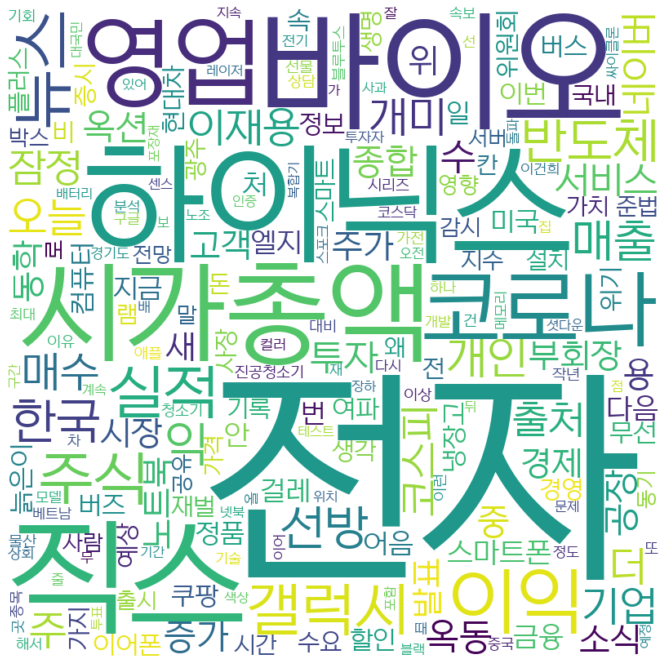

In [314]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

font_filename = 'C:/Users/nayay/AppData/Local/Microsoft/Windows\Fonts/NEXONLv1GothicRegular.ttf'

wordcloud = WordCloud(width = 800, height = 800, font_path = font_filename,
                     background_color = 'white',
                     stopwords = [],
                     min_font_size = 10).generate_from_frequencies(keywords)

fig = plt.figure(figsize = (12, 12), facecolor = None)
plt.imshow(wordcloud, interpolation = 'bilinear')
plt.axis('off')
plt.show()
fig.savefig('wordcloud_samsungelectronics.png')